# Computer Vision color spaces

### Import statements

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### To edit an image making a copy of it is always a good idea!

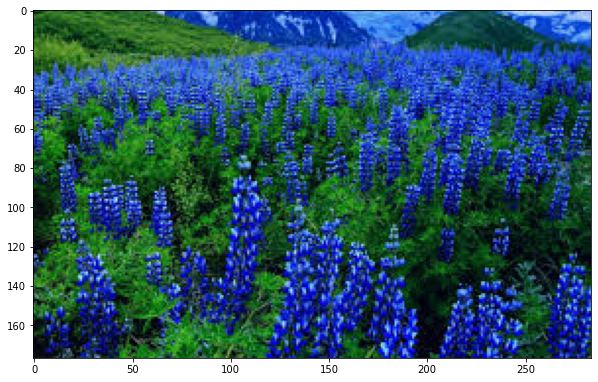

In [3]:
# Load an image
# And make a copy of the original image to avoid manipulating the original image
flowers = cv2.imread("img/blue-flowers.jpg")
blue_flowers = cv2.cvtColor(flowers, cv2.COLOR_BGR2RGB)
blue_flowers_copy = blue_flowers.copy()

plt.figure(figsize=(10, 8))
plt.imshow(blue_flowers);

[Hint](# "Numpy .copy function") 

## Color Spaces

### BGR Spliting the color channels

In [4]:
# Load a color image and split in is different B, G and R channels
B, G, R = cv2.split(blue_flowers_copy)

[Hint](# "cv2.split") 

In [5]:
# Show each channel channel on screen
B

array([[ 10,  21,  24, ..., 149, 149, 150],
       [  0,   0,   2, ..., 154, 156, 157],
       [ 49,  45,  53, ..., 162, 161, 161],
       ...,
       [ 11,  12,  10, ...,  13,   0,  23],
       [ 20,  13,   5, ...,   0,   0,  28],
       [  7,   8,  10, ...,   0,  38,  69]], dtype=uint8)

In [6]:
G

array([[ 48,  63,  70, ..., 184, 185, 187],
       [ 40,  43,  52, ..., 184, 186, 188],
       [102,  98, 109, ..., 188, 188, 188],
       ...,
       [ 12,  12,  12, ...,  37,  31,  54],
       [ 20,  14,  10, ...,  26,  10,  47],
       [ 17,  18,  20, ...,  24,  81, 120]], dtype=uint8)

In [7]:
R

array([[ 33,  43,  41, ..., 250, 245, 242],
       [  1,   0,   3, ..., 248, 246, 243],
       [ 34,  30,  38, ..., 245, 241, 241],
       ...,
       [ 16,  22,  24, ..., 125,  51,  49],
       [ 32,  18,   6, ...,  30,   0,  45],
       [ 19,  20,  22, ...,  76,  54,  45]], dtype=uint8)

#### Merging the color channels

In [8]:
# Modify a channel and then merge them all again
B = B + 60
B

array([[ 70,  81,  84, ..., 209, 209, 210],
       [ 60,  60,  62, ..., 214, 216, 217],
       [109, 105, 113, ..., 222, 221, 221],
       ...,
       [ 71,  72,  70, ...,  73,  60,  83],
       [ 80,  73,  65, ...,  60,  60,  88],
       [ 67,  68,  70, ...,  60,  98, 129]], dtype=uint8)

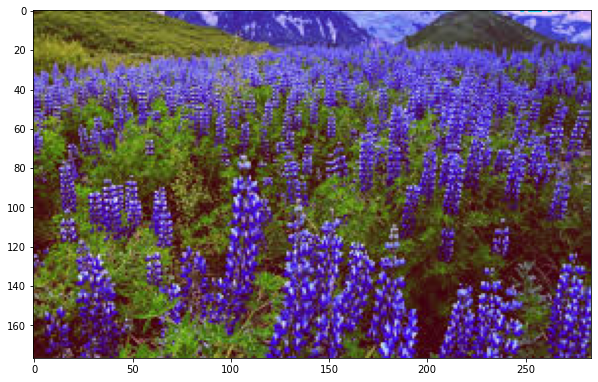

In [9]:
merged = cv2.merge([B, G, R])
plt.figure(figsize=(10, 8))
plt.imshow(merged);

[Hint](# "cv2.merge") 

In [10]:
# Create a black canvas with the same size as the image you loaded
black = np.zeros(blue_flowers_copy.shape[:2], dtype="uint8")

[Hint](# "use numpy np.zeros function with the img.shape[:2]") 

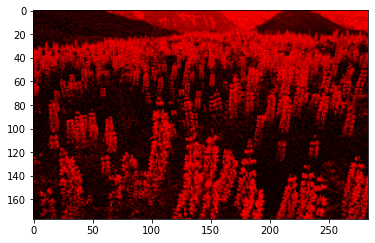

In [11]:
# Merge each channel with the black canvas 
# So you will end up with 3 images: (Red,Black,Black), (Black,Green,Black) and (Black,Black,Blue) 
# Assuming you are working with RGB, but BGR is also fine
merged1 = cv2.merge([R, black, black])
plt.imshow(merged1);

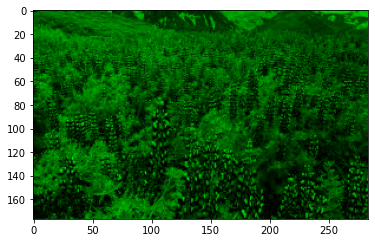

In [12]:
merged2 = cv2.merge([black, G, black])
plt.imshow(merged2);

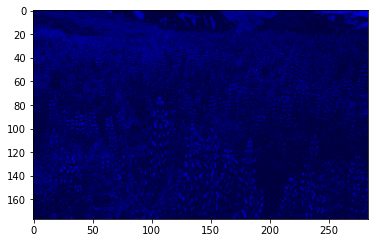

In [13]:
merged3 = cv2.merge([black, black, B])
plt.imshow(merged3);

[Hint](# "cv2.merge") 

### HSV: Hue Saturation Value

#### M&Ms challenge!

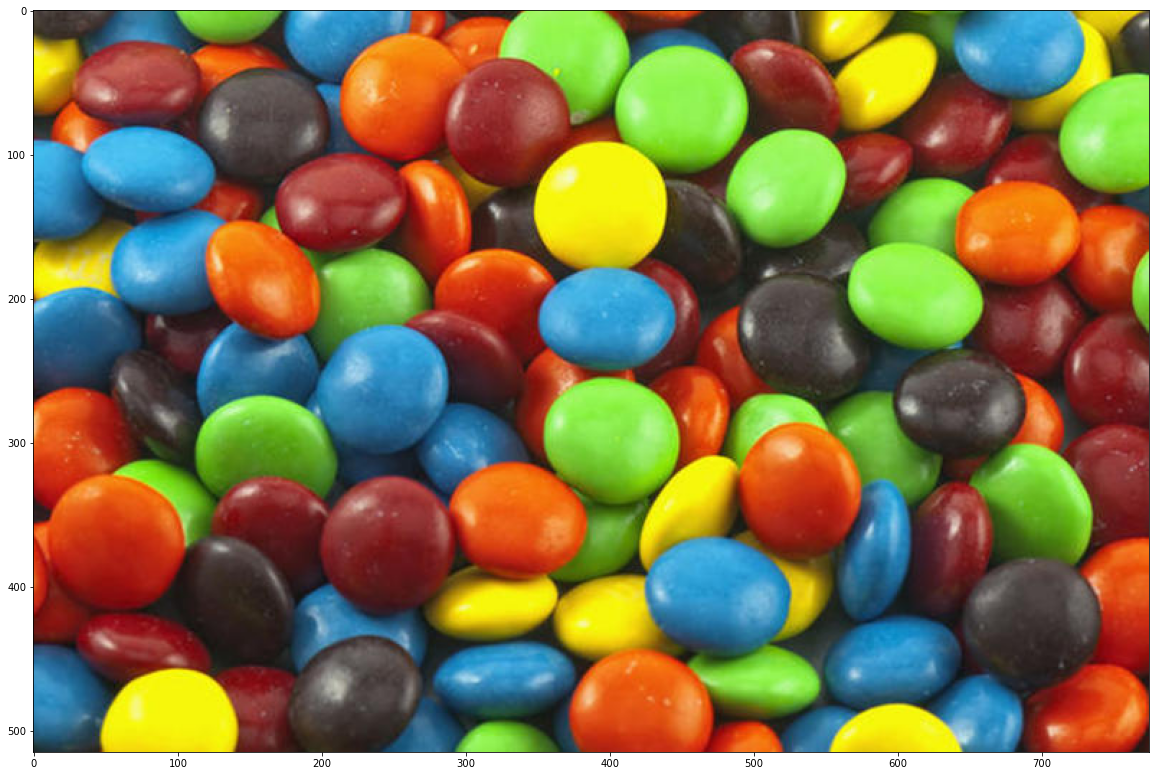

In [3]:
# Use the image below and convert it from BGR to HSV
img = cv2.imread('img/m.jpg')
plt.figure(figsize = (20,15));
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));


[Hint](# "cv2.cvtColor") 

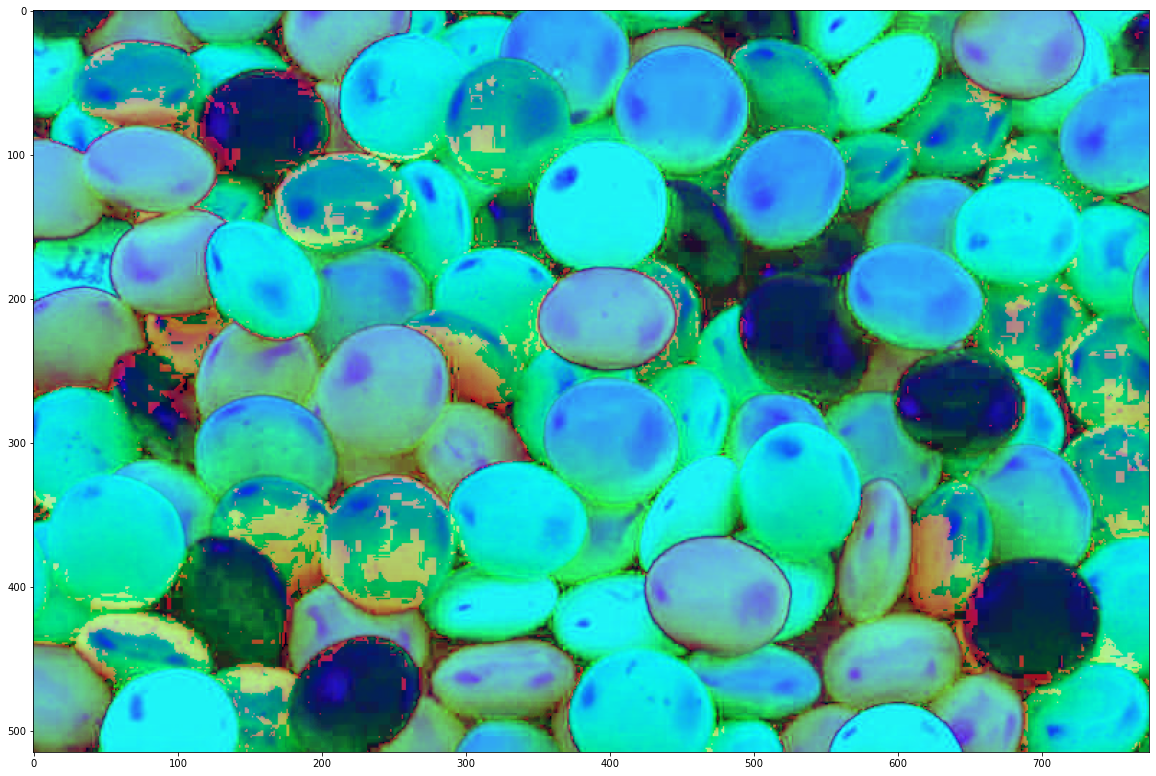

In [4]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize = (20,15))
plt.imshow(hsv);

In [5]:
# Split the H,S and V channels 
H, S, V = cv2.split(hsv)

In [6]:
H

array([[11, 11, 11, ..., 25, 23, 20],
       [13, 13, 11, ..., 23, 22, 19],
       [13, 13, 13, ..., 19, 17, 17],
       ...,
       [92, 95, 93, ...,  6,  6,  5],
       [95, 95, 95, ...,  6,  6,  5],
       [98, 98, 95, ...,  6,  6,  5]], dtype=uint8)

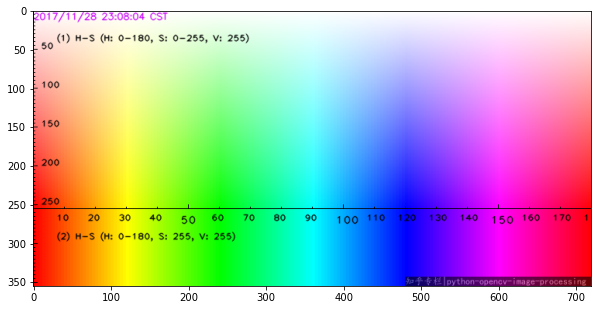

In [17]:
map = cv2.imread("img/hsv.png")
hsv_map = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(hsv_map);

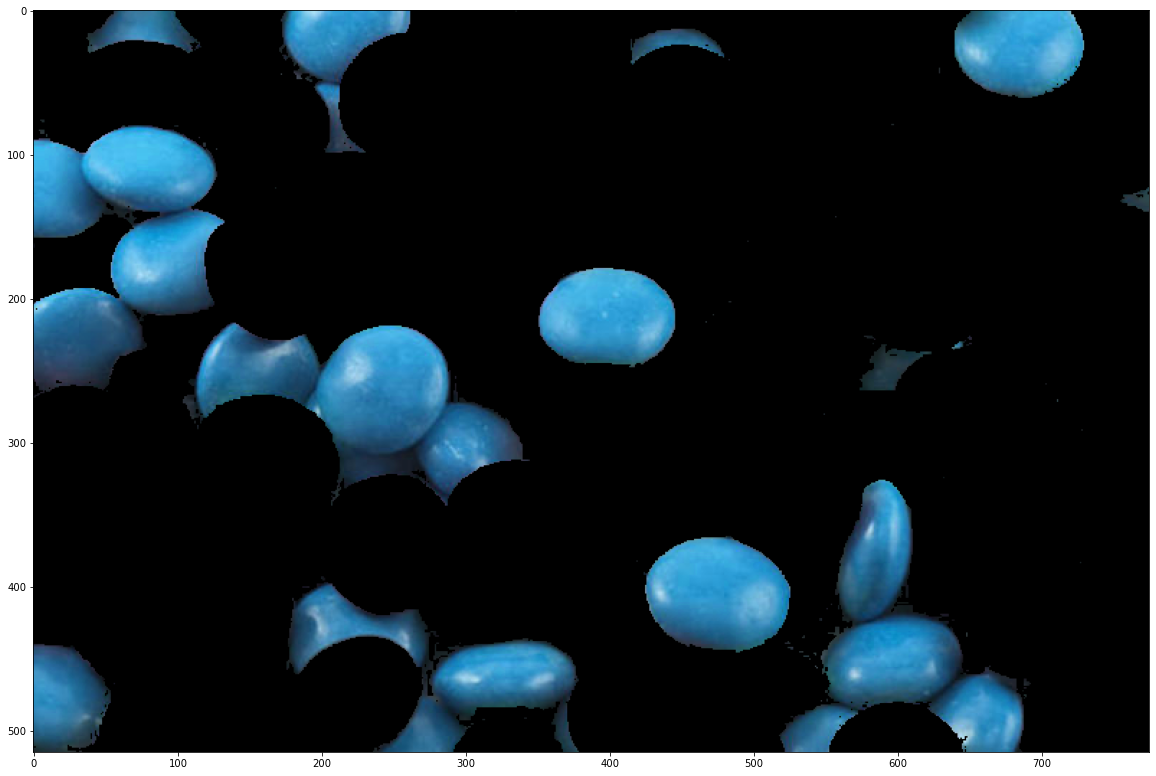

In [11]:
# Create a mask to filter out the Blue M&Ms (remember you need a lower and upper range)
# Make a copy of the hsv image and apply the mask to it, then display the image
lower_range = (90, 50, 20)
upper_range = (130, 255, 255)

hsv_copy = hsv.copy()
mask = cv2.inRange(hsv_copy, lower_range, upper_range)

masked_hsv = hsv.copy()
masked_hsv[mask == 0] = [0, 0, 0]

plt.figure(figsize = (20,15))
plt.imshow(cv2.cvtColor(masked_hsv, cv2.COLOR_HSV2RGB));

[Hint](# "cv2.inRange") 

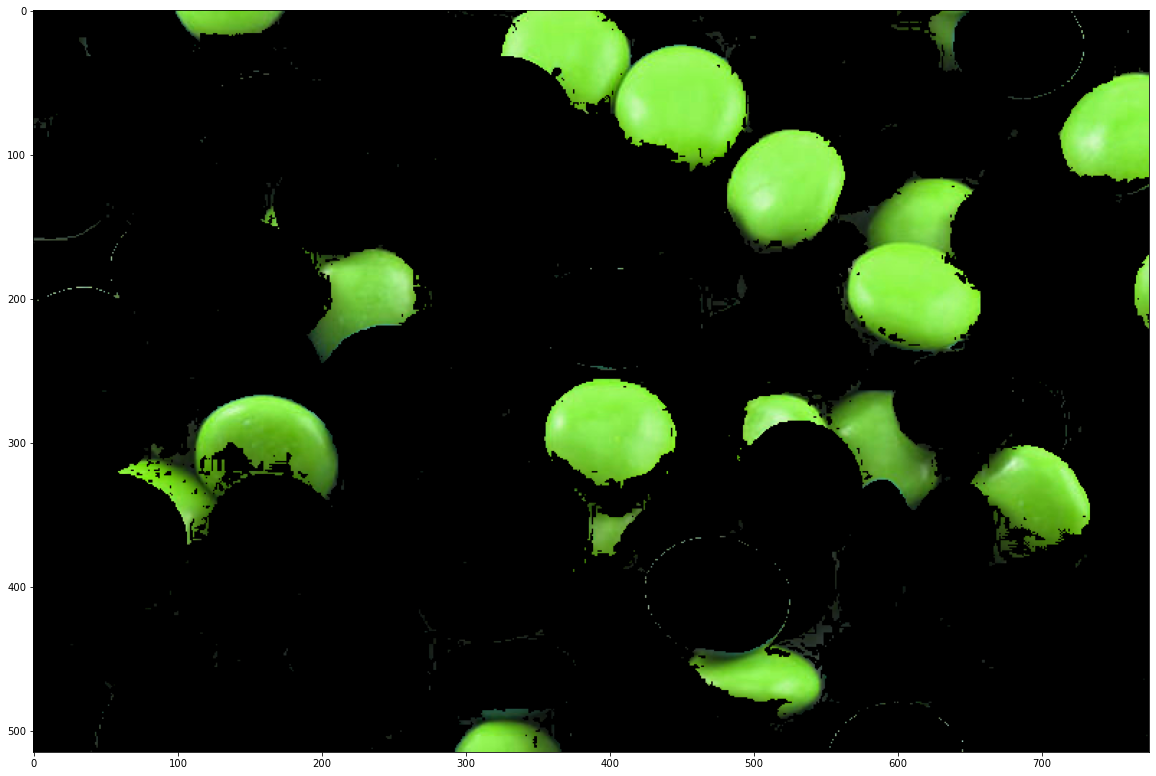

In [12]:
# Repeat the same but now with the greens
lower_range = (45, 35, 0)
upper_range = (80, 255, 255)
mask = cv2.inRange(hsv_copy, lower_range, upper_range)

masked_green = hsv.copy()
masked_green[mask == 0] = [0, 0, 0]

plt.figure(figsize = (20,15))
plt.imshow(cv2.cvtColor(masked_green, cv2.COLOR_HSV2RGB));

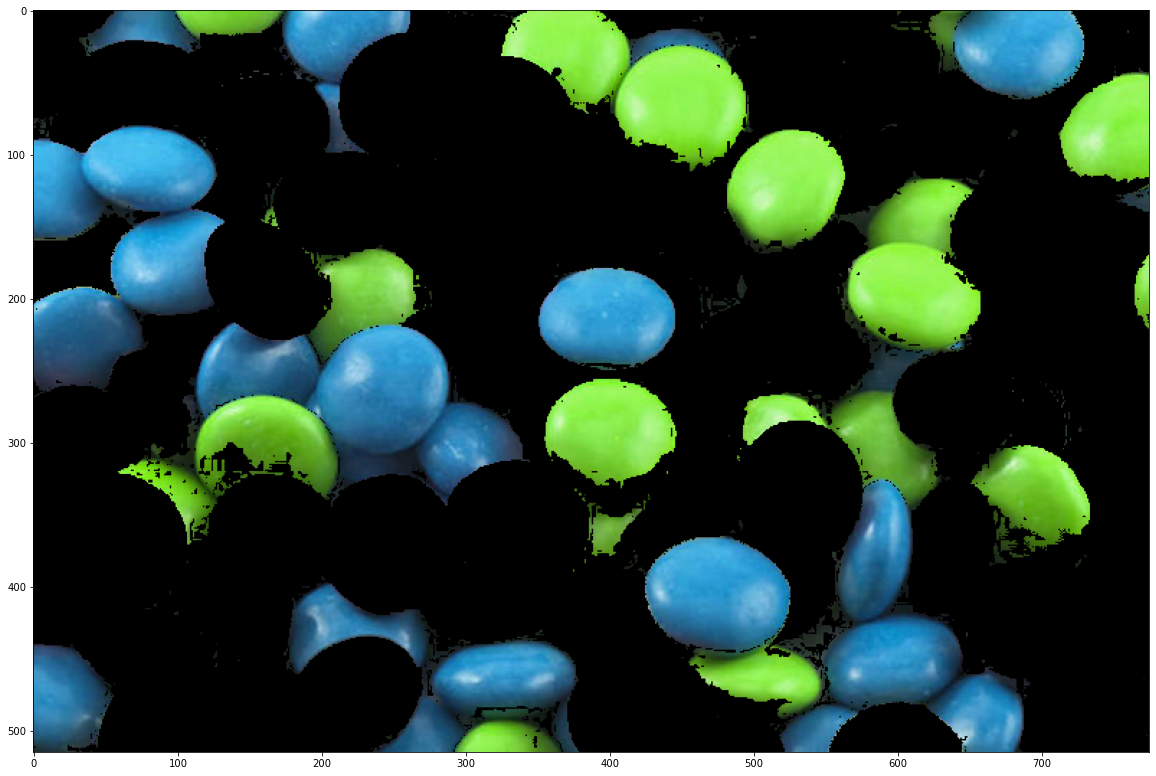

In [20]:
# Now combine both masks togheter so we can see all greens and blues in the same image!
combined = cv2.add(masked_hsv, masked_green)
plt.figure(figsize = (20,15))
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_HSV2RGB));

In [25]:
# Now lets combine both masks but also some opacity, we want to be able to see all M&Ms but
# Blues and greens will show as int he image above while the other colors will be faded out with some opacity
# You just need to add alpha to apply opacity to the dark parts of the mask, then display the image
opacity = 0.3
image = cv2.addWeighted(masked_hsv, 0.4, masked_green, 0.8, 0, dst)
plt.imshow(image)

NameError: name 'dst' is not defined

[Hint](# "cv2.addWeighted") 

In [ ]:
# Below you will find an example with oranges and greens just for reference so you can see what we want to accomplish
# In this example the oranges are not perfect, and it can be improved a lot easily.

## Mini project

### Level 1

#### Ball tracker

1. Given an image with a ball on it isolate the ball

### Level 2

#### Ball tracker

1. Make it track a ball in real time (either with a video or a webcam)

### Level 3

#### Ball Tracker

1. Can you make it track two or more different color balls at the same time?